install.packages("lifecycle")

In [16]:
library("factoextra")
library("dplyr")
library("ggplot2")
library(readxl)
library(MASS)

# 2018/2019

## 1

In [4]:
x1 <- c(1,0.88,0.96,0.94,0.9,0.9)
x2 <- c(0.88,1,0.9,0.91,0.94,0.95)
x3 <- c(0.96,0.9,1,0.96,0.93,0.92)
x4 <- c(0.94,0.92,0.96,1,0.93,0.94)
x5 <- c(0.9,0.94,0.93,0.93,1,0.95)
x6 <- c(0.9,0.95,0.92,0.94,0.95,1)

R <- data.frame(cbind(x1,x2,x3,x4,x5,x6))

In [5]:
R

x1,x2,x3,x4,x5,x6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.00,0.88,0.96,0.94,0.90,0.90
0.88,1.00,0.90,0.92,0.94,0.95
0.96,0.90,1.00,0.96,0.93,0.92
0.94,0.91,0.96,1.00,0.93,0.94
0.90,0.94,0.93,0.93,1.00,0.95
0.90,0.95,0.92,0.94,0.95,1.00


In [6]:
eigen(R)

eigen() decomposition
$values
[1] 5.63863139+0.00000000i 0.17338981+0.00000000i 0.05753825+0.00058623i
[4] 0.05753825-0.00058623i 0.04330677+0.00000000i 0.02959553+0.00000000i

$vectors
              [,1]          [,2]                  [,3]                  [,4]
[1,] -0.4039766+0i  0.5592013+0i  0.5271592-0.0446401i  0.5271592+0.0446401i
[2,] -0.4047007+0i -0.5200330+0i  0.5471464+0.0000000i  0.5471464+0.0000000i
[3,] -0.4105477+0i  0.3937014+0i -0.1029311-0.0142836i -0.1029311+0.0142836i
[4,] -0.4112915+0i  0.2177269+0i -0.5326389+0.1071432i -0.5326389-0.1071432i
[5,] -0.4090941+0i -0.2980348+0i -0.2940946-0.0988248i -0.2940946+0.0988248i
[6,] -0.4098196+0i -0.3544420+0i -0.1267893+0.0492452i -0.1267893-0.0492452i
                 [,5]           [,6]
[1,]  0.4772015788+0i -0.33942034+0i
[2,] -0.2997351740+0i  0.07610479+0i
[3,] -0.3369026823+0i  0.75040844+0i
[4,] -0.4446927491+0i -0.41333501+0i
[5,]  0.0003851385+0i -0.30510549+0i
[6,]  0.6092472995+0i  0.22793393+0i


,comp.1,comp.2,comp.3,comp.4,comp.5,comp.6
,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>
Variance,5.6386314+0i,0.1733898+0i,5.753825e-02+5.8623e-04i,5.753825e-02-5.8623e-04i,0.043306773+0i,0.029595530+0i
Proportion of Variance,0.9397719+0i,0.0288983+0i,9.589708e-03+9.7705e-05i,9.589708e-03-9.7705e-05i,0.007217796+0i,0.004932588+0i
Cumulative Proportion,0.9397719+0i,0.9686702+0i,9.782599e-01+9.7705e-05i,9.878496e-01+0.0000e+00i,0.995067412+0i,1.000000000+0i
variabel,comp.1,comp.2,comp.3,comp.4,comp.5,comp.6
<chr>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>,<cpl>
x1,-0.40398+0i,0.55920+0i,0.52716-0.04464i,0.52716+0.04464i,0.47720+0i,-0.33942+0i
x2,-0.40470+0i,-0.52003+0i,0.54715+0.00000i,0.54715+0.00000i,-0.29974+0i,0.07610+0i
x3,-0.41055+0i,0.39370+0i,-0.10293-0.01428i,-0.10293+0.01428i,-0.33690+0i,0.75041+0i
x4,-0.41129+0i,0.21773+0i,-0.53264+0.10714i,-0.53264-0.10714i,-0.44469+0i,-0.41334+0i


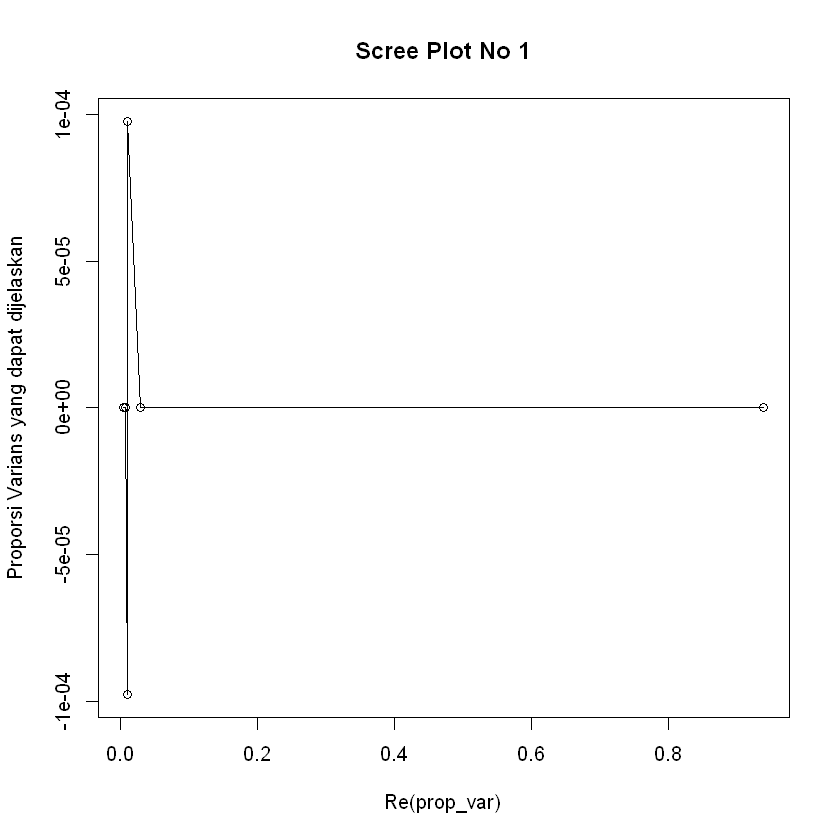

In [7]:
prcompcor<-function(cor){
  cor<-cor
  p<-ncol(cor)
  eig<-eigen(cor)$values
  eigvec<-eigen(cor)$vectors
  std<-sqrt(eig)
  #meanvec<-colMeans(data)
  vartot<-p
  prop_var<-eig/vartot
  cum_prob<-cumsum(prop_var)
  
  prcomp_name<-rep(0,ncol(cor))
    for ( i in 1:ncol(cor)){
       prcomp_name[i]<-paste("comp",i,sep=".")
  }
  loadings<-data.frame(colnames(cor),round(eigvec,5))
  colnames(loadings)<-c("variabel",prcomp_name)
  importancevar<-data.frame(rbind(eig,prop_var,cum_prob))
  rownames(importancevar)<-c("Variance","Proportion of Variance","Cumulative Proportion")
  colnames(importancevar)<-prcomp_name
  scree<-plot(prop_var,type="o",ylab="Proporsi Varians yang dapat dijelaskan",main="Scree Plot No 1")
  result<-list(importancevar,loadings,scree)
  names(result)<-c("Importance of components :","Loadings (Coefficient): ","Scree plot")
  return(result)
}
result <- prcompcor(R)
result

scree plotnya yaallah :') <br>
Proporsi varians komponen utama pertama adalah 0.94. Hal ini berarti 94% varians data dapat dijelaskan olek komponen utama pertama.

## 2

## 3

In [10]:
data <- read_excel("R_NOMOR2_UAS.xlsx", 
    sheet = "Sheet2")
data

Kalkulus II,Statmat I,Metstat I,Kelas
<dbl>,<dbl>,<dbl>,<chr>
82,83,82,A
80,79,79,A
80,80,78,A
81,82,83,A
80,78,81,A
80,82,79,A
79,78,80,A
82,82,82,A
82,80,81,A


In [11]:
data$Kelas <- as.factor(data$Kelas)
summary(data)

  Kalkulus II      Statmat I       Metstat I     Kelas 
 Min.   :73.00   Min.   :72.00   Min.   :73.00   A:15  
 1st Qu.:77.00   1st Qu.:76.25   1st Qu.:76.00   B:15  
 Median :79.00   Median :79.50   Median :78.50         
 Mean   :78.77   Mean   :78.87   Mean   :78.47         
 3rd Qu.:80.75   3rd Qu.:81.75   3rd Qu.:81.00         
 Max.   :82.00   Max.   :84.00   Max.   :83.00         

In [13]:
S <- cov(data[,1:3])
S

,Kalkulus II,Statmat I,Metstat I
Kalkulus II,6.116092,7.002299,6.250575
Statmat I,7.002299,9.291954,7.167816
Metstat I,6.250575,7.167816,8.119540


In [18]:
# Persamaan Diskriminan
set.seed(1234)

k <- length(levels(data$Kelas))
n <- nrow(data)

idx <- sample(1:n, 30)
data.training <- data[idx,]
model <- lda(data.training$Kelas~., data = data.training)
model

Call:
lda(data.training$Kelas ~ ., data = data.training)

Prior probabilities of groups:
  A   B 
0.5 0.5 

Group means:
  `Kalkulus II` `Statmat I` `Metstat I`
A      80.60000    80.86667    80.46667
B      76.93333    76.86667    76.46667

Coefficients of linear discriminants:
                     LD1
`Kalkulus II` -0.6377238
`Statmat I`    0.1588690
`Metstat I`   -0.1491321

Persamaan diskriminan : y = -0.63x1 + 0.16x2 - 0.14x3

In [19]:
# Prediksi
pred <- predict(model, data.training[,-4])
pred

,A,B
1,0.0151257150,0.984874285
2,0.0100887466,0.989911253
3,0.0822908384,0.917709162
4,0.9658383595,0.034161640
5,0.9522939170,0.047706083
6,0.9919040120,0.008095988
7,0.9525281558,0.047471844
8,0.9944915359,0.005508464
9,0.0211817190,0.978818281
10,0.6998949871,0.300105013


In [20]:
# Cross Table

ct <- table(data.training$Kelas,pred$class)
ct

   
     A  B
  A 13  2
  B  2 13

In [21]:
# APER

jumlah_misklasifikasi = 4 # Jumlah BB
jumlah_seluruh =30
aper <- jumlah_misklasifikasi/jumlah_seluruh*100
aper

[1] 13.33333

Jika ada seorang mahasiswa semester 3 (di luar sampel) mendapatkan nilai Kalkulus II, Statmat I dan Metstat I masing-masing 79,80, dan 77, maka bagaimana prediksi Saudara? Apakah masuk di kelas A atau kelas B?

In [29]:
nilai <- matrix(c(79,80,77), nrow = 1)
nilai <- data.frame(nilai)
colnames(nilai) <- c("Kalkulus II", "Statmat I", "Metstat I")
predict(model, nilai)

$class
[1] B
Levels: A B

$posterior
          A         B
1 0.3601325 0.6398675

$x
        LD1
1 0.2499764